In [1]:
import numpy as np
from scipy.stats import norm
from ipywidgets import FloatSlider, HBox, VBox
import bqplot.pyplot as plt

### This is an example of an application launched from EDX Studio via a web link.
### It is a live application, and the gaussian profile pictured below can be modified by adjusting the sliders.

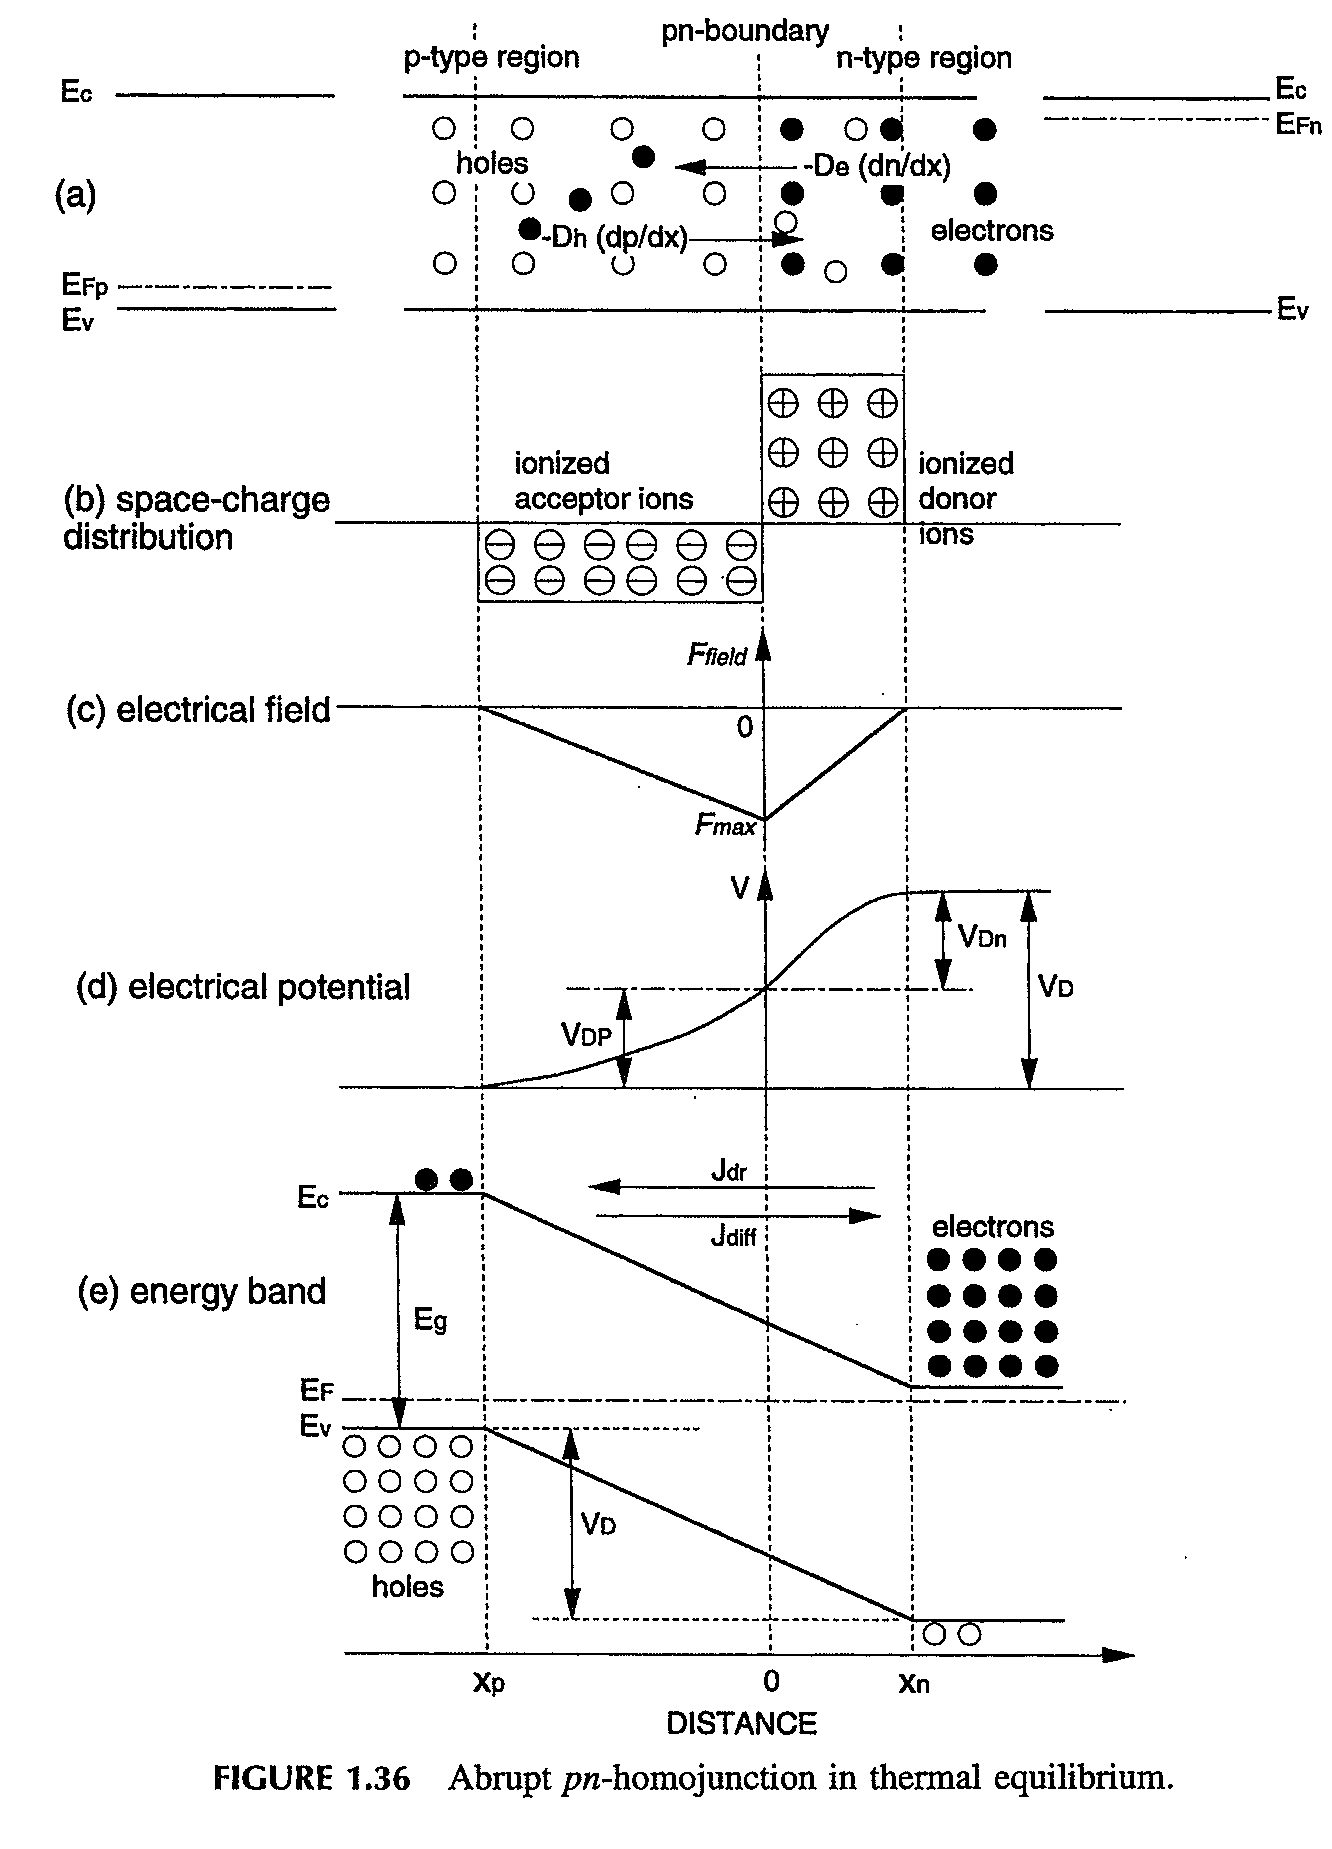

In [2]:
from IPython.core.display import Image 
Image(url='https://i.imgur.com/YQZSIDO.png',embed=True,height=400, width=800)

In [3]:
x = np.linspace(-10, 10, 200)
y = norm.pdf(x)

# plot the gaussian density
title_tmpl = 'Gaussian Density (mu = {} and sigma = {})'
pdf_fig = plt.figure(title=title_tmpl.format(0, 1))
pdf_line = plt.plot(x, y, 'm', stroke_width=3)

In [4]:
# use two sliders to represent mu and sigma
mu_slider = FloatSlider(description='mu', value=0, min=-5, max=5, step=.1)
sigma_slider = FloatSlider(description='sigma', value=1, min=0.1, max=5, step=.1)

slider_layout = HBox([mu_slider, sigma_slider])

In [5]:
def update_density(change):
    new_mu = mu_slider.value
    new_sigma = sigma_slider.value
    # update the y attribute of the plot with the new pdf
    # computed using new mu and sigma values
    pdf_line.y = norm.pdf(x, new_mu, new_sigma)
    
    # also update the fig title
    pdf_fig.title = title_tmpl.format(new_mu, new_sigma)

# register the above callback with the 'value' trait of the sliders
mu_slider.observe(update_density, 'value')
sigma_slider.observe(update_density, 'value')

In [6]:
# now put all the widgets together into a simple dashboard
# the plot should update now when the slider values are updated!
final_layout = VBox([pdf_fig, slider_layout])
final_layout